# Description

Group work for predicting survivors from Titanic. Data used in this is from Kaggle Titanic ML Competition. 

# Imports and data loading

In [181]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [182]:
DATA_PATH = os.path.join("data")

In [183]:
def load_csv_data(data_directory, csv_filename):
    csv_path = os.path.join(data_directory, csv_filename)
    return pd.read_csv(csv_path)

In [184]:
train = load_csv_data(DATA_PATH, "train.csv")
test = load_csv_data(DATA_PATH, "test.csv")

In [185]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [186]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [187]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Describing values

- PassengerId = Id for every passenger
- Survived = 1 is for survived and 0 is for not survived
- Pclass = Passenger's class (1 = Upper class, 2 = Middle class, 3 = Lower class)
- Name = Name of the passenger
- Age = Passenger's age
- SibSp = Number of siblings of the passengers aboard
- Ticket = Ticket number
- Parch = Number of parents/children of the passenger aboard
- Fare = Fare spend by passenger
- Embarked = Port of Embarkation

# Describing the data 

In [189]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for null values

In [190]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


- Age and Cabin class has many NULL values which needs to be replaced or dropped 

### Data describe in histograms

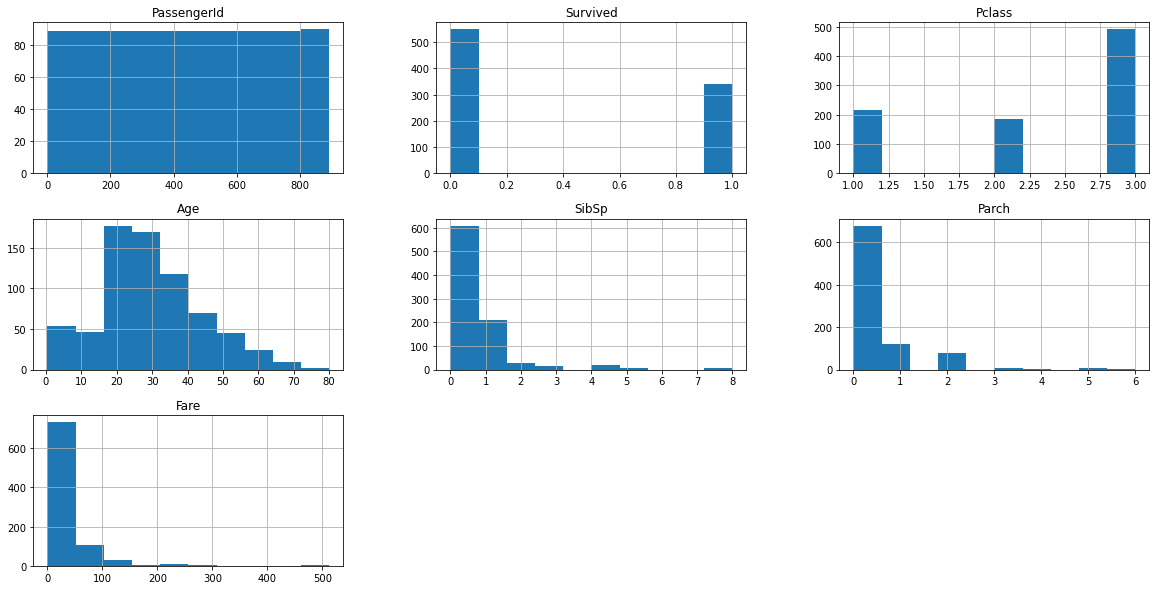

In [191]:
train.hist(bins=10, figsize=(20,10));

- Average age of the passengers were lower than expected, only 29.7
- Many passenger were travelling without parents or children

### Survival by classes 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

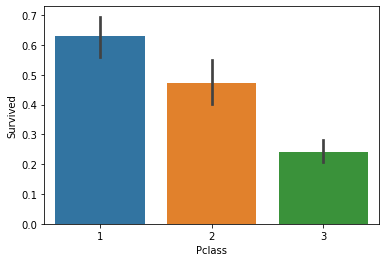

In [192]:
sns.barplot(x='Pclass', y='Survived', data=train)

- Looking at the data, seems like the survival rate was highest in the first class. 

### Survival by sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

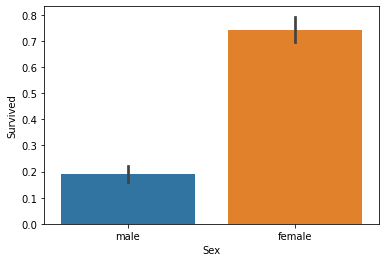

In [193]:
sns.barplot(x='Sex', y='Survived', data=train)

- Females had much higher survival rate

### Survival with Siblings/Spouses

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

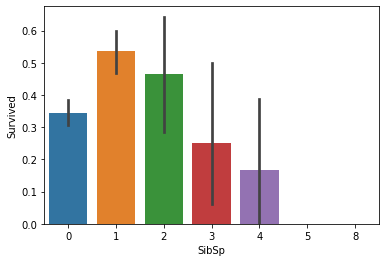

In [194]:
sns.barplot(x='SibSp', y='Survived', data=train)

- The more siblings/spouses there were, less percentage survived

### Total survivals

In [195]:
# (0 = did not survive, 1 = survived)
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- There were exactly 342 survivors in Titanic

### Males that survived

In [196]:
print(train['Survived'][train['Sex'] == "male"].value_counts())

0    468
1    109
Name: Survived, dtype: int64


### Females that survived

In [197]:
print(train['Survived'][train['Sex'] == "female"].value_counts())

1    233
0     81
Name: Survived, dtype: int64


### Survival by class

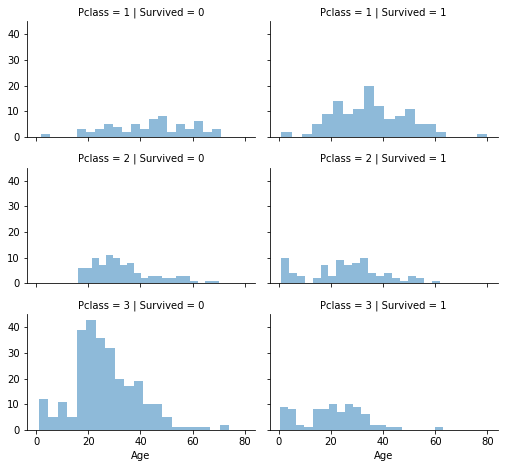

In [198]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Pearsons correlation

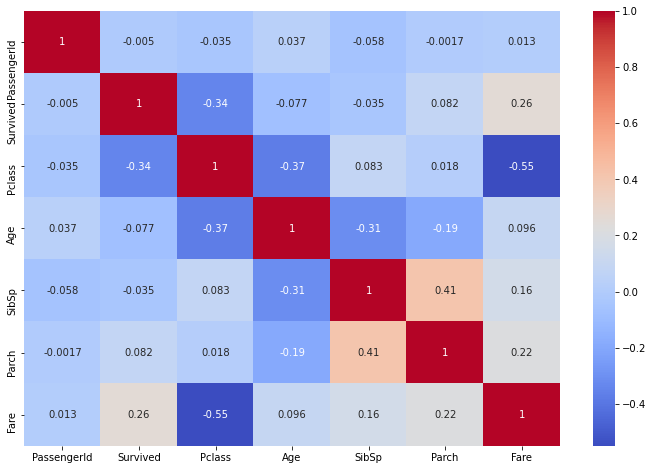

In [199]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(method="pearson"), annot=True, cmap="coolwarm");

- Seems like the more passenger pays for the ticket, the more likely he/she is to survive. 

# Preparing the data

### Replacing null/missing values and dropping useless categories

#### Embarked: fill with the most common one

In [200]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [201]:
common_value = "S"
data = [train]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

#### Age: Fill in NULL values by creating random INT generator

In [202]:
data = [train, test]
for dataset in data: 
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    random_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
train["Age"].isnull().sum()

0

#### Dropping PassenderId since it's not used in defining survival

In [203]:
train = train.drop(["PassengerId"], axis=1)

#### Cabin: Dropping cabin 

In [204]:
train = train.drop(['Cabin'], axis=1)

#### Ticket: Dropping ticket

In [205]:
train = train.drop(["Ticket"], axis=1)

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 59.3+ KB


### Converting values 

#### Sex: Convert sex into numeric value

In [207]:
genders = {"male": 0, "female": 1}
data = [train]

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [208]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30.0000,C
